## Importing Libraries and Loading Data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import re

# Load the dataset
df = pd.read_csv('emotion_dataset.csv')

# Replace NaN values in 'Clean_Text' with empty strings
df['Clean_Text'] = df['Clean_Text'].fillna("")

# Define X and y
X = df['Clean_Text']  # Cleaned text
y = df['Emotion']     # Emotion labels

# Print the first few rows to check
X.head(), y.head()


(0                                                     
 1                       Sage Act upgrade list tommorow
 2    WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
 3    eye  true hazel eyeand brilliant  Regular feat...
 4      ugh babe hugggzzz u  babe naamazed nga ako e...
 Name: Clean_Text, dtype: object,
 0    neutral
 1        joy
 2    sadness
 3        joy
 4        joy
 Name: Emotion, dtype: object)

## Splitting Data into Train and Test Sets

In [2]:
# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Vectorizing Text with TF-IDF

In [3]:
# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


## Training Random Forest Model

In [4]:
# Train a Random Forest model with 1000 estimators
rf_model = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_model.fit(X_train_vectorized, y_train)


RandomForestClassifier(n_estimators=1000, random_state=42)

## Making Predictions and Evaluating the Model

In [5]:
# Make predictions on the test set
y_rf_pred = rf_model.predict(X_test_vectorized)

# Print model evaluation metrics
accuracy = accuracy_score(y_test, y_rf_pred)
print("Random Forest Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_rf_pred))


Random Forest Accuracy: 0.6306940652392585
Classification Report:
               precision    recall  f1-score   support

       anger       0.69      0.51      0.59       836
     disgust       0.81      0.17      0.28       202
        fear       0.85      0.63      0.73      1104
         joy       0.57      0.85      0.68      2214
     neutral       0.53      0.71      0.61       481
     sadness       0.62      0.54      0.58      1327
       shame       0.84      0.91      0.88        23
    surprise       0.73      0.35      0.47       772

    accuracy                           0.63      6959
   macro avg       0.71      0.58      0.60      6959
weighted avg       0.66      0.63      0.62      6959



## Visualizing Confusion Matrix

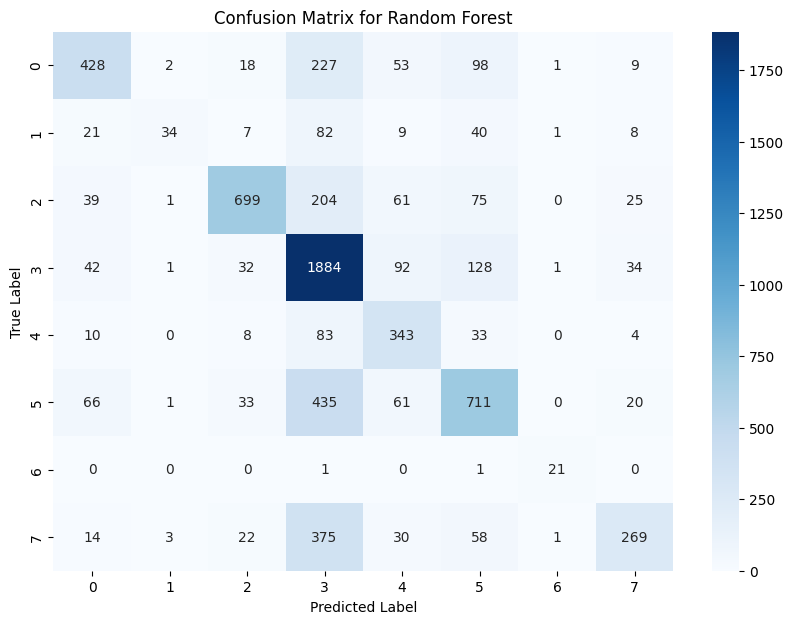

In [6]:
# Confusion matrix visualization
conf_matrix = confusion_matrix(y_test, y_rf_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


This confusion matrix shows model performance:

- Diagonal values are correct predictions, like 699 for label 2 and 1884 for label 3.
- Misclassifications occur frequently for label 0 being predicted as 3 (227 times) and label 5 as 3 (435 times).
- Smaller classes like 6 and 7 are often misclassified, with label 6 predicted as 3 in 21 cases.
- Overall, the model performs better on larger classes but struggles with smaller or similar labels.


## Saving the Model and Vectorizer

In [7]:
# Save the model and vectorizer using joblib
joblib.dump(rf_model, 'emotion_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')


['vectorizer.pkl']

## Loading the Model and Vectorizer for Future Predictions

In [8]:
# Load the model and vectorizer for future predictions
loaded_model = joblib.load('emotion_model.pkl')
vectorizer = joblib.load('vectorizer.pkl')


## Text Preprocessing Function

In [9]:
# Function to preprocess text input
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove extra spaces
    text = ' '.join(text.split())
    
    return text


## Making Predictions for New Input Text

In [10]:
# Example of predicting emotion for new text
new_text = "@CaitlynXJesus8 love you to caitlyn.. So sad I have to miss switch I might die"
cleaned_text = preprocess_text(new_text)

# Vectorize the cleaned text
text_vectorized = vectorizer.transform([cleaned_text])

# Predict emotion
predicted_emotion = loaded_model.predict(text_vectorized)
print("Predicted Emotion:", predicted_emotion[0])


Predicted Emotion: sadness


## Interactive Loop for Emotion Prediction

In [11]:
# Infinite loop for interactive predictions
while True:
    new_text = input("Enter text (or type 'exit' to quit): ")
    
    if new_text.lower() == 'exit':
        print("Exiting the program.")
        break
    
    # Process the new text input
    cleaned_text = preprocess_text(new_text)
    
    # Vectorize the cleaned text
    text_vectorized = vectorizer.transform([cleaned_text])
    
    # Predict the emotion
    predicted_emotion = loaded_model.predict(text_vectorized)
    
    # Output the predicted emotion
    print("Predicted Emotion:", predicted_emotion[0])


Predicted Emotion: neutral
Predicted Emotion: neutral
Predicted Emotion: neutral
Predicted Emotion: neutral
Predicted Emotion: neutral
Predicted Emotion: neutral
Exiting the program.


## Comparing with the Loaded Model

In [12]:
# Use the loaded model for predictions
y_pred_loaded = loaded_model.predict(X_test_vectorized)
loaded_model_accuracy = accuracy_score(y_test, y_pred_loaded)
print("Accuracy with Loaded Model:", loaded_model_accuracy)


Accuracy with Loaded Model: 0.6306940652392585


## Visualizing Actual vs Predicted Labels

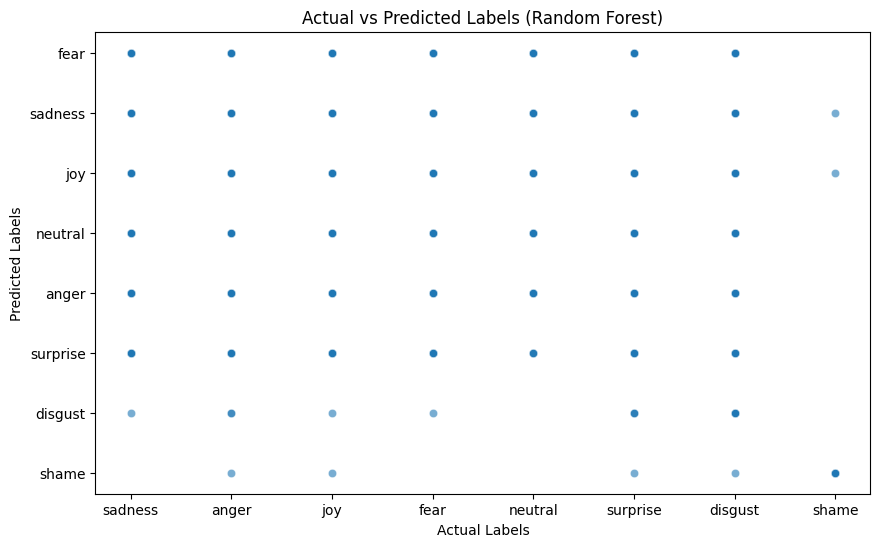

In [13]:
# Plot comparison of actual vs predicted labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_rf_pred, alpha=0.6)
plt.title("Actual vs Predicted Labels (Random Forest)")
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.show()


## Confusion Matrix with Loaded Model

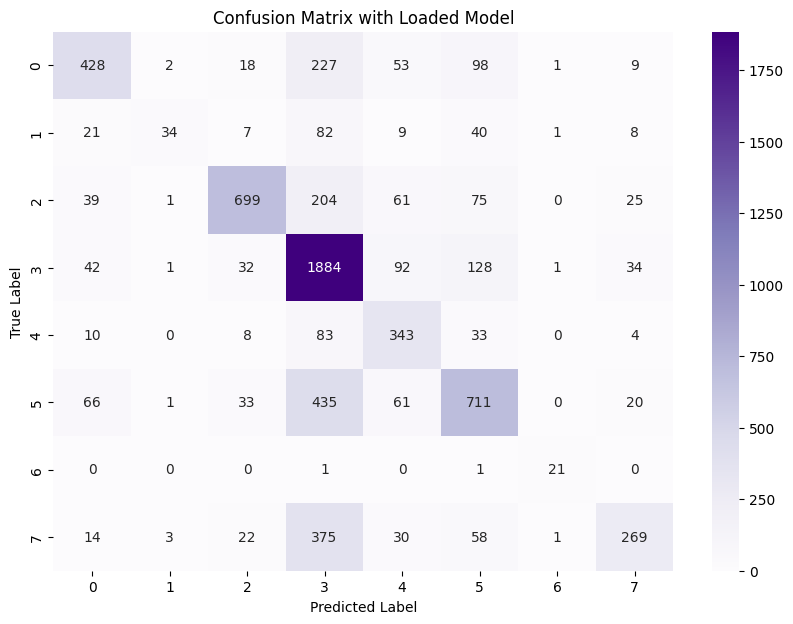

In [14]:
# Visualizing difference between actual and predicted emotions
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix with Loaded Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
